In [1]:
import random
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("annotationRecords1.csv")

In [3]:
pred_probs_df = pd.read_csv("probs.csv")

In [4]:
labels_df = pd.read_csv("labels.csv")

In [5]:
#get image name from path
pred_probs_df['image_name'] = pred_probs_df['path'].apply(lambda x: x.split('/')[-1])

In [6]:
labels_df=pd.read_csv("labels.csv")

In [7]:
#get image name from path
labels_df['image_name'] = labels_df['path'].apply(lambda x: x.split('/')[-1])

In [8]:
for index, row in labels_df.iterrows():
    labels_df.at[index, :] = row.replace(-1, 0)

In [9]:
df1 = dataset[dataset['image_name'].isin(pred_probs_df['image_name'])]
df1=df1.drop(columns=['comments','_id','date','end_time', 'filepath','start_time', 'time_in_seconds','no_particular_expression',
'patientID', 'smile', 'start_time', 'time_in_seconds','wrinkled_forehead', 'unclear'])

In [10]:
#renaming columns for consistency
name_map={'au10_raising_of_upper_lip':'AU10',
       'au12_pulling_at_corner_lip':'AU12', 'au20_lip_stretcher':'AU20', 'au24_lip_presser':'AU24',
       'au25_parting_lips':'AU25', 'au26_jaw_drop':'AU26', 'au27_mouth_stretch':'AU27',
       'au43_eyes_closed':'AU43', 'au4_brow_lowering':'AU4', 'au6_cheek_raising':'AU6',
       'au7_tightning_of_eyelids':'AU7', 'au9_wrinkling_of_nose':'AU9'}
df1.rename(columns=name_map, inplace=True)

In [11]:
#grouping by image_name
grouped_df = df1.groupby(['image_name','annotator'], as_index=False).first()
grouped_df

,image_name,annotator,AU10,AU12,AU20,AU24,AU25,AU26,AU27,AU43,AU4,AU6,AU7,AU9
0,2021-06-23 12-17-44_000000000593.jpg,babatundeshofolu,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-06-23 12-17-44_000000000593.jpg,hannahweisman,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-06-23 12-17-44_000000000593.jpg,jennifer.noa,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-06-23 12-17-44_000000000593.jpg,rishika.patel@ufl.edu\health,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-06-23 12-17-44_000000000662.jpg,babatundeshofolu,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24726,2022-03-30 17-14-24_000000001763.jpg,aribahali,0,0,0,0,1,0,0,0,0,0,0,0
24727,2022-03-30 17-14-24_000000001764.jpg,aribahali,0,0,0,0,0,1,0,0,0,0,0,0
24728,2022-03-30 17-14-24_000000001765.jpg,aribahali,0,0,0,0,0,1,0,0,0,0,0,0
24729,2022-03-30 17-14-24_000000001767.jpg,aribahali,0,0,0,0,1,0,0,0,0,0,0,0


In [12]:
annotator_counts = grouped_df['annotator'].value_counts()
print(annotator_counts)

hannahweisman                   11734
rishika.patel@ufl.edu\health     5647
jennifer.noa                     3321
babatundeshofolu                 3097
aribahali                         848
ezequielbautista                   39
kaelynnrodriguez                   33
kmaisuria                           6
wkratochvil                         6
Name: annotator, dtype: int64


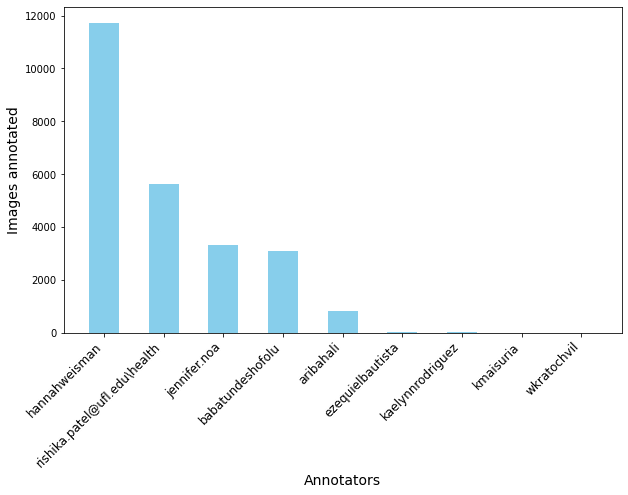

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
plt.bar(annotator_counts.index, annotator_counts.values, color='skyblue', width=0.5)  
plt.title('', fontsize=16)  
plt.xlabel('Annotators', fontsize=14)  
plt.ylabel('Images annotated', fontsize=14)  
plt.xticks(fontsize=12, rotation=45, ha='right')  # Adjust x-axis tick font size and rotation for better readability
plt.show()

In [14]:
labels_df=labels_df.drop(columns=['dataset','path','AU1','AU2', 'AU14','AU15', 'AU17','AU23'])

In [15]:
order_mapping = {value: index for index, value in enumerate(labels_df['image_name'])}
grouped_df['order'] = grouped_df['image_name'].map(order_mapping)

In [16]:
grouped_df = grouped_df.sort_values(by='order').drop(columns='order')

In [17]:
grouped_df.columns

Index(['image_name', 'annotator', 'AU10', 'AU12', 'AU20', 'AU24', 'AU25',
       'AU26', 'AU27', 'AU43', 'AU4', 'AU6', 'AU7', 'AU9'],
      dtype='object')

In [18]:
df = grouped_df
annotators = df['annotator'].unique()
labels = df.columns[2:]

In [19]:
labels_df=labels_df.drop(columns=['AU10', 'AU12', 'AU20', 'AU24', 'AU25', 'AU26', 'AU27', 'AU43','AU7', 'AU9'])

In [20]:
df=df.drop(columns=['AU10', 'AU12', 'AU20', 'AU24', 'AU25', 'AU26', 'AU27', 'AU43','AU7', 'AU9'])

In [21]:
df

,image_name,annotator,AU4,AU6
23783,2022-01-31 23-54-30_000000000007.jpg,wkratochvil,0,0
23782,2022-01-31 23-54-30_000000000007.jpg,kmaisuria,0,0
23781,2022-01-31 23-54-30_000000000007.jpg,hannahweisman,0,0
23780,2022-01-31 23-54-30_000000000007.jpg,ezequielbautista,0,0
23761,2022-01-28 05-31-32_000000000822.jpg,hannahweisman,0,0
...,...,...,...,...
23755,2021-11-12 09-46-12_000000000886.jpg,hannahweisman,0,0
23756,2021-11-12 09-46-12_000000000888.jpg,hannahweisman,0,0
23757,2021-11-12 09-46-12_000000000890.jpg,hannahweisman,0,0
23758,2021-11-12 09-46-12_000000000893.jpg,hannahweisman,0,0


In [22]:
annotators = df['annotator'].unique()
classes = df.columns.difference(['image_name', 'annotator'])

num_samples = len(df['image_name'].unique())
num_annotators = len(annotators)
num_classes = len(classes)
labels_multiannotator = np.full((num_samples, num_annotators, num_classes), np.nan)

for i, row in df.iterrows():
    sample_idx = np.where(df['image_name'].unique() == row['image_name'])[0][0]
    annotator_idx = np.where(annotators == row['annotator'])[0][0]
    class_indices = [np.where(classes == col)[0][0] for col in classes]
    labels_multiannotator[sample_idx, annotator_idx, class_indices] = row[classes].values

In [23]:
labels_multiannotator.shape

(12549, 9, 2)

In [24]:
num_annotations = np.sum(~np.isnan(labels_multiannotator).any(axis=2), axis=1)

In [25]:
num_annotations

array([4, 4, 4, ..., 1, 1, 1])

In [26]:
pred_prob = pred_probs_df[pred_probs_df['image_name'].isin(df['image_name'])]

In [27]:
pred_prob=pred_prob.drop(columns=['dataset','path','AU1','AU2', 'AU14','AU15', 'AU17','AU23','AU10', 'AU12', 'AU20', 'AU24', 'AU25', 'AU26', 'AU27', 'AU43','AU7', 'AU9'])

In [28]:
prob=pred_prob.drop(columns=['image_name'])

In [29]:
pred_probs=prob.iloc[:, 0:].values

In [30]:
pred_probs

array([[3.1990088e-03, 6.4741727e-03],
       [1.2081428e-01, 6.5904450e-02],
       [1.2611853e-01, 9.0592000e-02],
       ...,
       [6.0590275e-04, 6.4965704e-04],
       [9.5853200e-05, 9.1933210e-05],
       [9.5853200e-05, 9.1933210e-05]])

In [38]:
import multiannotators
from multiannotators import get_label_quality_multiannotator

In [40]:
import imp
imp.reload(multiannotators)

<module 'multiannotators' from '/home/keerthana/omops/multiannotators.py'>

In [41]:
results=get_label_quality_multiannotator(labels_multiannotator,pred_probs,consensus_method = "majority_vote",quality_method = "crowdlab",verbose=False)

hello
call
hi
(12549, 2)
(12549,)
(12549, 2)


In [42]:
results["label_quality"]

,num_annotations,consensus_label,annotator_agreement,consensus_quality_score
0,4,"[0, 0]","[1.0, 1.0]",0.994181
1,4,"[0, 0]","[1.0, 1.0]",0.890168
2,4,"[0, 0]","[1.0, 1.0]",0.880987
3,4,"[0, 0]","[1.0, 1.0]",0.957386
4,4,"[0, 0]","[1.0, 1.0]",0.998290
...,...,...,...,...
12544,1,"[0, 0]","[1.0, 1.0]",0.999654
12545,1,"[0, 0]","[1.0, 1.0]",0.999891
12546,1,"[0, 0]","[1.0, 1.0]",0.999359
12547,1,"[0, 0]","[1.0, 1.0]",0.999905
